In [2]:
from data.loader import FileIO

train_data = FileIO.load_data_set('/home/yzh/code/selfrec/mk_dataset/yelp_tiny/merge_train.txt', 'graph')

In [3]:
from collections import defaultdict

users: dict[str, int] = {}
items: dict[str, int] = {}

training_set_u: dict[str, dict[str, int]] = defaultdict(dict)
training_set_i: dict[str, dict[str, int]] = defaultdict(dict)

In [4]:
for user, item, rating in train_data:
    if user not in users:
        user_id = len(users)
        users[user] = user_id

    if item not in items:
        item_id = len(items)
        items[item] = item_id

    training_set_u[user][item] = rating
    training_set_i[item][user] = rating

In [5]:
user_count: dict[str, int] = {}
item_count: dict[str, int] = {}

for user in training_set_u:
    user_count[user] = len(training_set_u[user])

for item in training_set_i:
    item_count[item] = len(training_set_i[item])

In [6]:
import random
random.seed(125)

# 从 user 中随机选 1000 个
selected_users = random.sample(list(user_count.keys()), 1000)
selected_users = [users[user] for user in selected_users]
print(selected_users)

# 从 item 中选择最多的前 500 个和最少的后 500 个
from heapq import nlargest, nsmallest

# 找出值最大的前 500 个项
hot_items = nlargest(500, item_count.items(), key=lambda x: x[1])

# 找出值最小的后 500 个项
cold_items = nsmallest(500, item_count.items(), key=lambda x: x[1])

# 如果你只需要键，可以将结果转换为列表
hot_keys = [items[item[0]] for item in hot_items]
cold_keys = [items[item[0]] for item in cold_items]

print("Top 500 items:", hot_keys)
print("Bottom 500 items:", cold_keys)

[15912, 14583, 19722, 37172, 11885, 23007, 9882, 20055, 279, 4938, 10143, 30771, 33057, 27316, 6562, 16876, 19241, 10335, 32106, 12242, 32136, 9408, 3243, 18205, 35033, 28124, 1822, 11678, 10559, 4136, 3668, 28089, 5670, 24677, 30467, 34191, 2274, 31593, 12900, 7674, 24406, 37170, 27690, 15350, 520, 27959, 35452, 15911, 21766, 32074, 37177, 15419, 26577, 33526, 17851, 29968, 34728, 19694, 34542, 24225, 4708, 6572, 3096, 27794, 17120, 12152, 29850, 11742, 29534, 22637, 27598, 10908, 19105, 7364, 33354, 16211, 23638, 20879, 25206, 1494, 8023, 15625, 36520, 11492, 12508, 5114, 30557, 12642, 17657, 23934, 17339, 16600, 35092, 21108, 29769, 26904, 26813, 14038, 37016, 13519, 29789, 30403, 34537, 34822, 17497, 22345, 15798, 34449, 3011, 33059, 31406, 26910, 30171, 10929, 4783, 33411, 22828, 14864, 4930, 25803, 10871, 30248, 29321, 10368, 2203, 31969, 25416, 34541, 26914, 22983, 35286, 27564, 34233, 4492, 7044, 26967, 36712, 267, 1326, 9465, 21414, 30877, 12571, 1240, 36207, 3310, 6454, 19879

In [7]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [8]:
data = np.load('embs.npz')
user_embs = data['user_embs']  # (user_num, dim)
item_embs = data['item_embs']  # (item_num, dim)

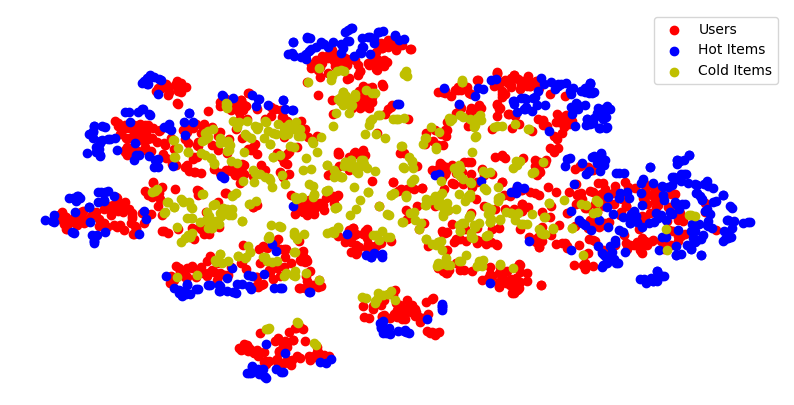

In [10]:
sampled_user_embs = user_embs[selected_users]
hot_item_embs = item_embs[hot_keys]
cold_item_embs = item_embs[cold_keys]

# 将用户和项目嵌入合并
combined_embs = np.vstack([sampled_user_embs, hot_item_embs, cold_item_embs])

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=125, perplexity=15, learning_rate=100)
embs_2d = tsne.fit_transform(combined_embs)

# 分割降维后的用户和项目嵌入
user_2d = embs_2d[:1000]
hot_item_2d = embs_2d[1000:1500]
cold_item_2d = embs_2d[1500:]

# 绘制可视化图
plt.figure(figsize=(10, 5))
plt.scatter(user_2d[:, 0], user_2d[:, 1], c='r', label='Users')
plt.scatter(hot_item_2d[:, 0], hot_item_2d[:, 1], c='b', label='Hot Items')
plt.scatter(cold_item_2d[:, 0], cold_item_2d[:, 1], c='y', label='Cold Items')
plt.legend()
plt.axis('off')  # 去除坐标轴
plt.savefig('embs.png', dpi=600, bbox_inches='tight')
plt.show()


In [16]:
gcn_data = np.load('LightGCN.npz')
user_embs = gcn_data['user_embs']  # (user_num, dim)
item_embs = gcn_data['item_embs']  # (item_num, dim)

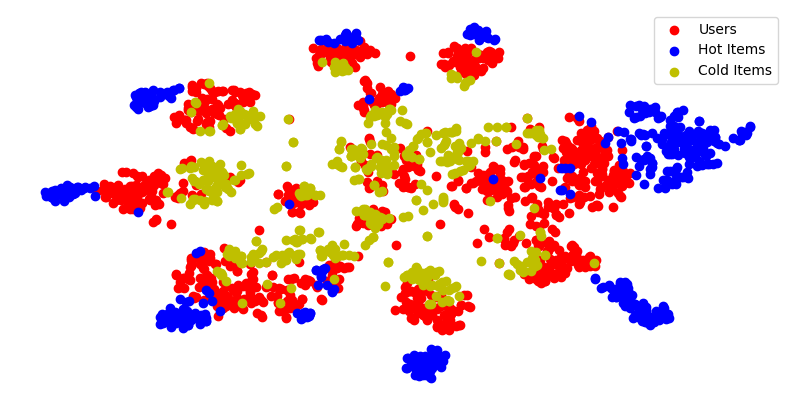

In [17]:
sampled_user_embs = user_embs[selected_users]
hot_item_embs = item_embs[hot_keys]
cold_item_embs = item_embs[cold_keys]

# 将用户和项目嵌入合并
combined_embs = np.vstack([sampled_user_embs, hot_item_embs, cold_item_embs])

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=125, perplexity=15, learning_rate=100)
embs_2d = tsne.fit_transform(combined_embs)

# 分割降维后的用户和项目嵌入
user_2d = embs_2d[:1000]
hot_item_2d = embs_2d[1000:1500]
cold_item_2d = embs_2d[1500:]


# 绘制可视化图
plt.figure(figsize=(10, 5))
plt.scatter(user_2d[:, 0], user_2d[:, 1], c='r', label='Users')
plt.scatter(hot_item_2d[:, 0], hot_item_2d[:, 1], c='b', label='Hot Items')
plt.scatter(cold_item_2d[:, 0], cold_item_2d[:, 1], c='y', label='Cold Items')
plt.axis('off')  # 去除坐标轴
plt.legend()
plt.savefig('LightGCN.png', dpi=600, bbox_inches='tight')
plt.show()

用户和热门项目紧贴

In [18]:
ncl_data = np.load('NCL.npz')
user_embs = ncl_data['user_embs']  # (user_num, dim)
item_embs = ncl_data['item_embs']  # (item_num, dim)

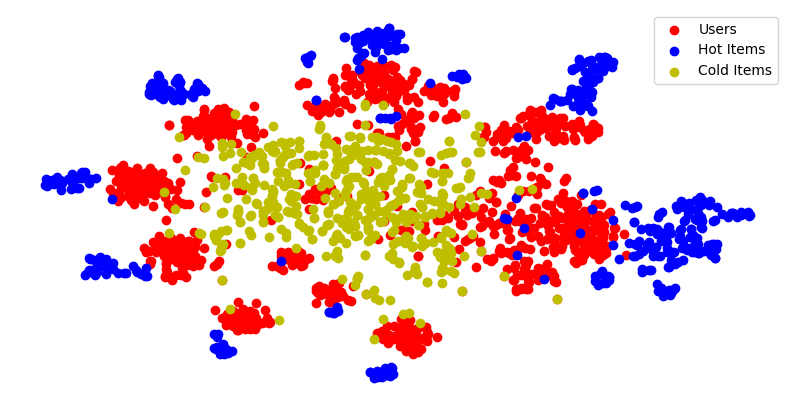

In [19]:
sampled_user_embs = user_embs[selected_users]
hot_item_embs = item_embs[hot_keys]
cold_item_embs = item_embs[cold_keys]

# 将用户和项目嵌入合并
combined_embs = np.vstack([sampled_user_embs, hot_item_embs, cold_item_embs])

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=125, perplexity=15, learning_rate=100)
embs_2d = tsne.fit_transform(combined_embs)

# 分割降维后的用户和项目嵌入
user_2d = embs_2d[:1000]
hot_item_2d = embs_2d[1000:1500]
cold_item_2d = embs_2d[1500:]


# 绘制可视化图
plt.figure(figsize=(10, 5))
plt.scatter(user_2d[:, 0], user_2d[:, 1], c='r', label='Users')
plt.scatter(hot_item_2d[:, 0], hot_item_2d[:, 1], c='b', label='Hot Items')
plt.scatter(cold_item_2d[:, 0], cold_item_2d[:, 1], c='y', label='Cold Items')
plt.axis('off')  # 去除坐标轴
plt.legend()
plt.savefig('NCL.png', dpi=600, bbox_inches='tight')
plt.show()